# Exercises in Classification I

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split

## Exercise 1

In this exercise, we continue from Exercise 1 and 2 from Multiple Linear Regression and look at the [Energy efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency) dataset (The file "EnergyEfficiency.csv" is also on Moodle). 

Answer the following questions:
1. Do a train-test split of the data and retrain the simple linear regression model between `SurfaceArea` and `HeatingLoad`.
2. Calculate R-square, MAE, and RMSE on the training set
3. Calculate R-square, MAE, a
nd RMSE on the test set
4. Does the model overfit?
5. Visualize the model (the straight line) trained on the training set in a scatter plot of the test dataset. Try also to add the line to a Seaborn regplot of the test dataset.

In [2]:
energy = pd.read_csv(".\\data\\EnergyEfficiency.csv")
X_energy = energy[['SurfaceArea']]
y_energy = energy['HeatingLoad']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_energy, y_energy, test_size=0.2, random_state=420)

In [4]:
X_train.mean()

SurfaceArea    673.670195
dtype: float64

In [5]:
y_train.mean()

np.float64(22.107442996742673)

# TRAIN

In [6]:
slr_model = linear_model.LinearRegression()

In [7]:
slr_model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred_train = slr_model.predict(X_train)

# R2 (Train)
R2 score is not very close to 1, thus does not overfit to the training data.

In [9]:
r2_score(y_train, y_pred_train)

0.4395060759760614

# MAE (Train)
Seems low,  seems tobe okie

In [10]:
mean_absolute_error(y_train, y_pred_train)

5.847316822272354

# RMSE (Train)

the mean of y value "HeatingLoad" is 22, thus a RMSE in train of 7.44 is not that bad. 

In [11]:
root_mean_squared_error(y_train, y_pred_train)

7.443069440644317

# TEST

In [12]:
y_pred_test = slr_model.predict(X_test)

# R2 (TEST)
R2 score shows no significant drop from the R2 score in the Train. 

In [13]:
r2_score(y_test, y_pred_test)

0.40656738697927286

# MAE (TEST)
It is larger, than the 5.8 for the train, could it be overfit?

In [14]:
mean_absolute_error(y_test, y_pred_test)

6.602252637132253

# RMSE (TEST)

not much higher, but still is higher than the 7.44 from Train. Could there be a suggestion of overfitting here?

In [15]:
root_mean_squared_error(y_test, y_pred_test)

8.160092124414497

Visualize the model (the straight line) trained on the training set in a scatter plot of the test dataset. Try also to add the line to a Seaborn regplot of the test dataset.

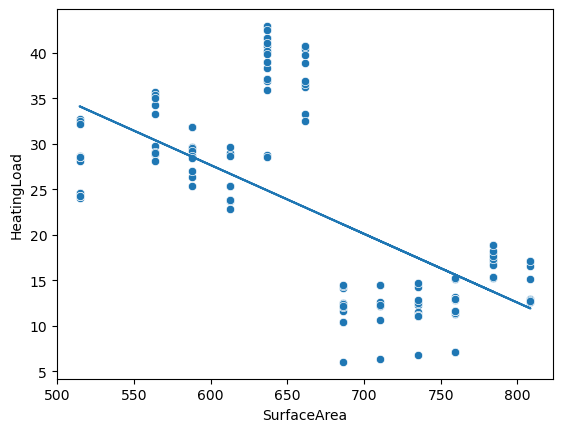

In [16]:
sns.scatterplot(x= X_test['SurfaceArea'], y= y_test)
plt.plot(X_train['SurfaceArea'], y_pred_train )
plt.show()

## Exercise 2

In this exercise, we will predict the two income classes in the adult dataset (The file "adult.csv" is also on Moodle). 

Answer the following questions:
1. Clean the `income` variable such that it has only two values
2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.
3. Create X and y dataset and split the datasets into training and testing sets
4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 
5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.
6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# 1 


In [18]:
adult = pd.read_csv(".\\data\\adult.csv")
adult = adult.replace({"<=50K." : "<=50K", ">50K.": ">50K" })
adult['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

# 2

In [19]:
y = adult['income']
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [20]:
#"age", "workclass", "fnlwgt",	"education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week",	"native-country"
X = adult.drop(columns = ["age", "income","workclass", "fnlwgt",	"education", "education-num", "marital-status", "occupation", "relationship", "capital-gain", "capital-loss", "hours-per-week",	"native-country"])
X.head()

,race,sex
0,White,Male
1,White,Male
2,White,Male
3,Black,Male
4,Black,Female


In [21]:
X  = pd.get_dummies(X, columns=['race', 'sex'], dtype=int, drop_first=True)
y  = pd.get_dummies(y, columns=['income'], dtype=int, drop_first=True)
y.head()


,>50K
0,0
1,0
2,0
3,0
4,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=420)          

In [23]:
knn5 = KNeighborsClassifier(n_neighbors=5)

In [24]:
knn5.fit(X_train, y_train)

c:\Users\Hassan\miniconda3\envs\venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [25]:
y_pred_train = knn5.predict(X_train)
y_pred_test = knn5.predict(X_test)

In [26]:
accuracy_score(y_train, y_pred_train)

0.7617591657339412

In [27]:
accuracy_score(y_test, y_pred_test)

0.7575956105151094

## Exercise 2

In this exercise, we will predict the two income classes in the adult dataset (The file "adult.csv" is also on Moodle). 

Answer the following questions:
1. Clean the `income` variable such that it has only two values
2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.
3. Create X and y dataset and split the datasets into training and testing sets
4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 
5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.
6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.